In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

Define all necessary variables:

* Time $t$
* Mass of pendulums $m$
* Gravitational acceleration $g$
* Spring constants $k$

Then define the 4 free variables $\theta_1$, $r_1$, $\theta_2$, $r_2$

1. Make them functions of time
2. Define first derivatives
3. Define second derivatives

In [2]:
t, m, g, k = smp.symbols('t m g k')

In [3]:
the1, the2, r1, r2 = smp.symbols(r'\theta_1, \theta_2, r_1, r_2', cls=smp.Function)

# theta1
the1 = the1(t)
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(the1_d, t)

the2 = the2(t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(smp.diff(the2, t), t)

r1 = r1(t)
r1_d = smp.diff(r1, t)
r1_dd = smp.diff(smp.diff(r1, t), t)

r2 = r2(t)
r2_d = smp.diff(r2, t)
r2_dd = smp.diff(smp.diff(r2, t), t)

Define cartesian coordinates of each bob

* Bob 1: $(x_1, y_1)$
* Bob 2: $(x_2, y_2)$

Note these are functions of $\theta_1$, $r_1$, $\theta_2$, $r_2$

In [4]:
x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls=smp.Function)
x1= x1(the1, r1)
y1= y1(the1, r1)
x2= x2(the1, r1, the2, r2)
y2= y2(the1, r1, the2, r2)

In [5]:
x1 = (1+r1)*smp.cos(the1)
y1 = -(1+r1)*smp.sin(the1)
x2 = (1+r1)*smp.cos(the1) + (1+r2)*smp.cos(the2)
y2 = -(1+r1)*smp.sin(the1)-(1+r2)*smp.sin(the2)

Define the Lagrangian

$$ L = T - V $$

where 

* T = $\frac{1}{2}m(\dot{x}_1^2 + \dot{y}_1^2) + \frac{1}{2}m(\dot{x}_2^2 + \dot{y}_2^2)$
* V = $mgy_1 + mgy_2 + \frac{1}{2}kr_1^2 + \frac{1}{2}kr_2^2 $

In [6]:
T = 1/2 * m * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + \
               smp.diff(x2, t)**2 + + smp.diff(y2, t)**2)
V = m*g*y1 + m*g*y2 + 1/2 * k * r1**2 + 1/2 * k * r2**2
L = T-V

Compute Lagrange's equations

$\frac{dL}{dz} - \frac{d}{dt} \frac{dL}{d\dot{z}} = 0$

where $z$ is each of $\theta_1$, $r_1$, $\theta_2$, $r_2$

In [7]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)
LE1 = LE1.simplify()

In [8]:
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)
LE2 = LE2.simplify()

In [9]:
LE3 = smp.diff(L, r1) - smp.diff(smp.diff(L, r1_d), t)
LE3 = LE3.simplify()

In [10]:
LE4 = smp.diff(L, r2) - smp.diff(smp.diff(L, r2_d), t)
LE4 = LE4.simplify()

In [11]:
LE1

m*(2.0*g*r_1(t)*cos(\theta_1(t)) + 2.0*g*cos(\theta_1(t)) - 2.0*r_1(t)**2*Derivative(\theta_1(t), (t, 2)) - 1.0*r_1(t)*r_2(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*r_1(t)*r_2(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 1.0*r_1(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 1.0*r_1(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(r_2(t), (t, 2)) - 2.0*r_1(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)*Derivative(r_2(t), t) - 1.0*r_1(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 4.0*r_1(t)*Derivative(\theta_1(t), t)*Derivative(r_1(t), t) - 4.0*r_1(t)*Derivative(\theta_1(t), (t, 2)) - 1.0*r_2(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*r_2(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 1.0*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 1.0*sin(\theta_1(t) - \theta_2(t))*Derivative(r_2(t), (t, 2)) - 2.0*cos(\theta_1(t) - \the

If we solve for $d^2 z / d t^2$ where $z$ is each of $\theta_1$, $r_1$, $\theta_2$, $r_2$ then we can get two equation for each free variable. Defining $v_z$ as $dz/dt$ we get

* $dz/dt = v_z$
* $dv_z/dt = \text{whatever we solved for}$

This turns our system of second order ODES into systems 1D differential equations.

**Example** $\frac{d^2 y}{dt^2} + 2\frac{dy}{dt} + y + 3 = 0$ (define $v = dy/dt$) gets turned into the system of 2 first order DE's (i) $dy/dt = v$ and  (ii) $dv/dt =  - 3 - y - 2v$

Specifically, define 

* $\omega_1 \equiv d\theta_1/dt$
* $\omega_2 \equiv d\theta_2/dt$
* $v_1 \equiv dr_1/dt$
* $v_2 \equiv dr_2/dt$

In [12]:
sols = smp.solve([LE1, LE2, LE3, LE4], (the1_dd, the2_dd, r1_dd, r2_dd),
                simplify=False, rational=False)

In [13]:
sols[the1_dd]

(-1.0*m*(1.0*r_1(t)*sin(\theta_1(t) - \theta_2(t)) + 1.0*sin(\theta_1(t) - \theta_2(t)))*(-1.0*r_2(t)**2 - 2.0*r_2(t) - 1.0)*cos(\theta_1(t) - \theta_2(t)) - 1.0*m*(-1.0*r_2(t)*sin(\theta_1(t) - \theta_2(t)) - 1.0*sin(\theta_1(t) - \theta_2(t)))*(-1.0*r_1(t)*r_2(t)*cos(\theta_1(t) - \theta_2(t)) - 1.0*r_1(t)*cos(\theta_1(t) - \theta_2(t)) - 1.0*r_2(t)*cos(\theta_1(t) - \theta_2(t)) - 1.0*cos(\theta_1(t) - \theta_2(t))))*(-2.0*g*m*sin(\theta_1(t)) + 1.0*k*r_1(t) - 2.0*m*r_1(t)*Derivative(\theta_1(t), t)**2 - 1.0*m*r_2(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 2.0*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)*Derivative(r_2(t), t) - 1.0*m*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 2.0*m*Derivative(\theta_1(t), t)**2)/(-1.0*m**2*(-2.0*r_1(t)**2 - 4.0*r_1(t) - 2.0)*(-1.0*r_2(t)**2 - 2.0*r_2(t) - 1.0)*cos(\theta_1(t) - \theta_2(t))**2 + 2.0*m**2*(-2.0*r_1(t)**2 - 4.0*r_1(t) - 2.0)*(-1.0*r_2(t)**2 - 2.0*r_2(t) - 1.0) + 1.0*m**2*(-1.0*

Create numpy functions that we can use with numerical methods

In [14]:
dw1dt_f = smp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the1_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)

dw2dt_f = smp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the2_dd])
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dv1dt_f = smp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r1_dd])
dr1dt_f = smp.lambdify(r1_d, r1_d)

dv2dt_f = smp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r2_dd])
dr2dt_f = smp.lambdify(r2_d, r2_d)

Define our system of ODES where $S = (\theta_1, \omega_1, \theta_2, \omega_2, r_1, v_1, r_2, v_2)$

In [15]:
def dSdt(S, t):
    the1, w1, the2, w2, r1, v1, r2, v2 = S
    return [
        dthe1dt_f(w1),
        dw1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dthe2dt_f(w2),
        dw2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr1dt_f(v1),
        dv1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr2dt_f(v2),
        dv2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
    ]

Define times, constants, solve ODE

In [16]:
t = np.linspace(0, 20, 1000)
g = 9.81
m=1
k=10
ans = odeint(dSdt, y0=[np.pi/2,0,(3/2)*np.pi/2,0,0,5,0,5], t=t)

Plot $\theta_1$ as function of time

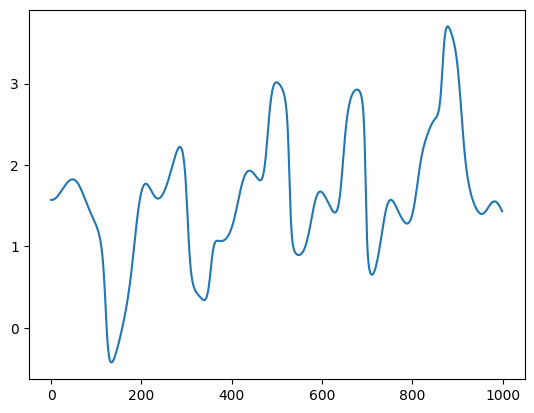

In [17]:
plt.plot(ans.T[0])

Get locations of $x_1$, $y_1$, $x_2$, $y_2$ given $\theta_1$, $r_1$, $\theta_2$, $r_2$

In [18]:
def get_x1y1x2y2(the1, the2, r1, r2):
    return ((1+r1)*np.cos(the1),
            -(1+r1)*np.sin(the1),
            (1+r1)*np.cos(the1) + (1+r2)*np.cos(the2),
            -(1+r1)*np.sin(the1)-(1+r2)*np.sin(the2)
    )

Get $x$s and $y$s as function of time

In [19]:
x1, y1, x2, y2 = get_x1y1x2y2(ans.T[0], ans.T[2], ans.T[4], ans.T[6])

Plot ys

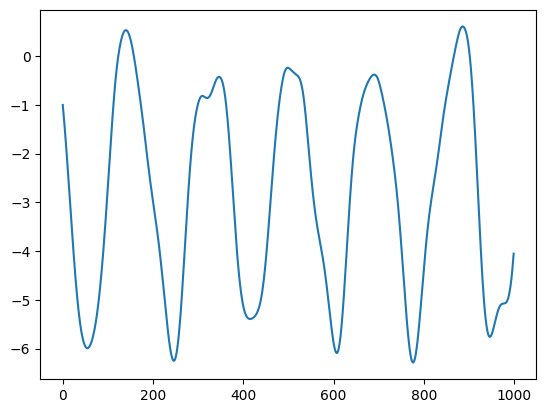

In [20]:
plt.plot(y1)

Make animation 

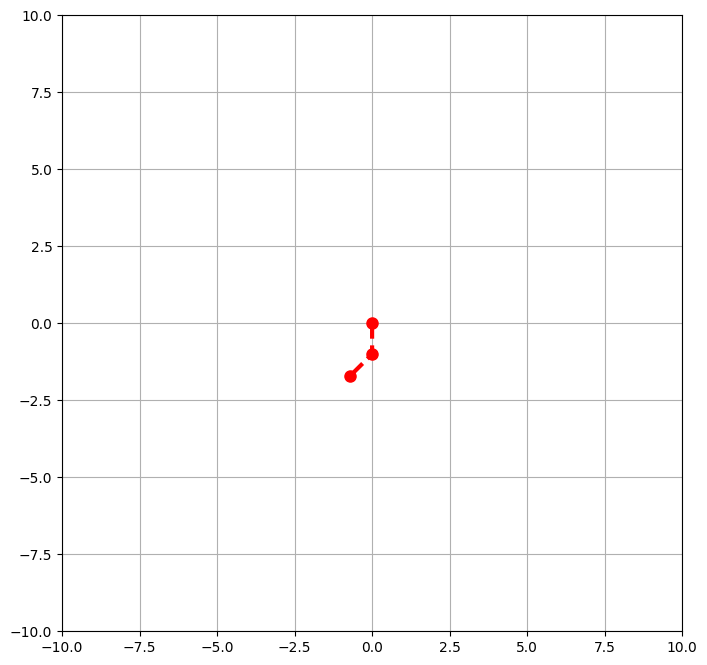

In [21]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-10, 10)
ax.set_xlim(-10,10)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('doubel_pandlum_spring.gif',writer='pillow',fps=50)